<a href="https://colab.research.google.com/github/mehraanjali/AnjaliMehrasPortfolio/blob/main/Sp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the Pandas library to work with data in a tabular format.
import pandas as pd

In [ ]:
# Read the data from a CSV file named 'APPLE_iPhone_SE.csv' and store it in a DataFrame named 'df'.
df = pd.read_csv('/content/APPLE_iPhone_SE.csv')
df

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...
...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE


In [ ]:
# Display the first few rows of the DataFrame 'df' to inspect the data.
df.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


In [ ]:
# Display the last few rows of the DataFrame 'df' to examine the end of the data.
df.tail()

,Ratings,Comment,Reviews
9708,5,Terrific purchase,Absolutely brilliantREAD MORE
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE..."
9710,5,Awesome,very niceREAD MORE
9711,5,Super!,Loving it as of now. Good Product .READ MORE
9712,5,Terrific purchase,NiceElegant ElectricREAD MORE


In [ ]:
# Get the shape of the DataFrame 'df' to determine the number of rows and columns.
df.shape

(9713, 3)

In [ ]:
# Get the column names of the DataFrame 'df' to see the names of the data columns.
df.columns

Index(['Ratings', 'Comment', 'Reviews'], dtype='object')

In [ ]:
# Count the number of duplicated rows in the DataFrame 'df' and sum them up.
df.duplicated().sum()

649

In [ ]:
# Count the number of missing (null) values in each column of the DataFrame 'df' and sum them up.
df.isnull().sum()

Ratings    0
Comment    0
Reviews    0
dtype: int64

In [ ]:
# Display information about the DataFrame 'df,' including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  9713 non-null   int64 
 1   Comment  9713 non-null   object
 2   Reviews  9713 non-null   object
dtypes: int64(1), object(2)
memory usage: 227.8+ KB


In [ ]:
  # Import the Matplotlib library to create data visualizations and plots.
import matplotlib.pyplot as plt

# Import the Seaborn library for statistical data visualization.
import seaborn as sns

In [ ]:
# Import the 'warnings' module and set it to ignore warnings.

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Get the unique values in the 'Ratings' column of the DataFrame 'df'.
df['Ratings'].unique()

array([5, 4, 3, 1, 2])

In [ ]:
# Count the occurrences of each unique value in the 'Ratings' column of the DataFrame 'df'.
df['Ratings'].value_counts()

5    6788
4    1717
3     535
1     474
2     199
Name: Ratings, dtype: int64

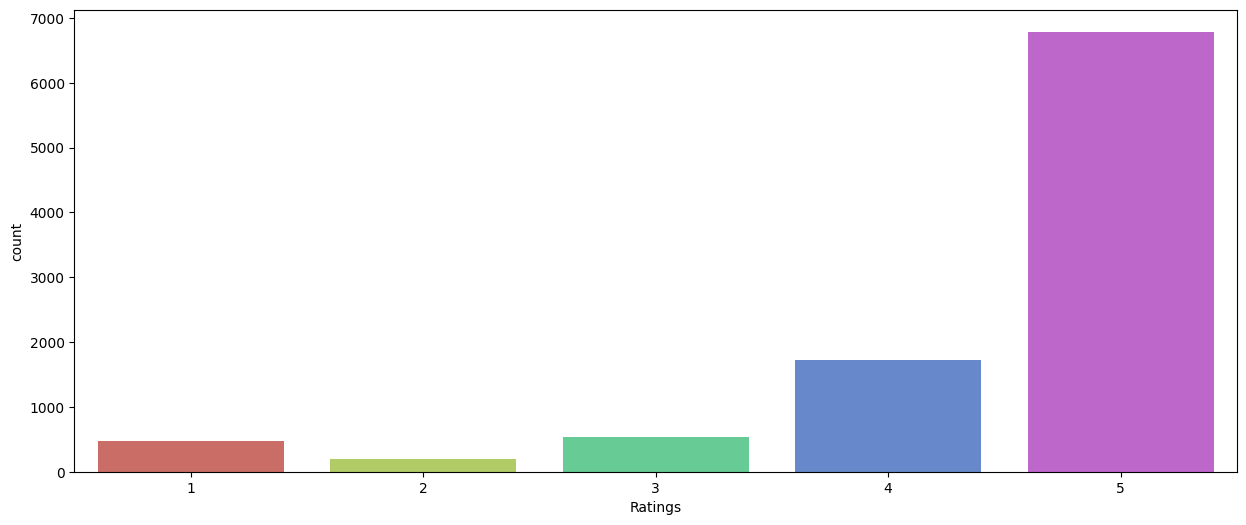

In [ ]:
# Create a count plot to visualize the distribution of ratings in the DataFrame 'df'.
# Set the figure size to (15, 6) for better visualization.
# Use the 'hls' color palette for coloring the bars.

plt.figure(figsize=(15,6))
sns.countplot(x='Ratings', data = df, palette = 'hls')
plt.show()

In [ ]:
  # Calculate and store the counts of each rating category in the 'balance_counts' variable.

  balance_counts = df.groupby('Ratings')['Ratings'].agg('count').values
  balance_counts

array([ 474,  199,  535, 1717, 6788])

In [ ]:
# Import Plotly libraries for creating interactive visualizations.

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
# Initialize a Plotly figure.

fig = go.Figure()

# Add a bar for Ratings.
fig.add_trace(go.Bar(
  x = [0],
  y=[balance_counts[0]],
  name='Ratings',
  text=[balance_counts[0]],
  textposition='auto',
  marker_color= 'blue'
))

# Add a bar for Reviews.
fig.add_trace(go.Bar(x= [1],
  y=[balance_counts[1]],
  name='Reviews',
  text=[balance_counts[1]],
  textposition='auto',
  marker_color= 'red'
))

# Show the Plotly figure.
fig.show()

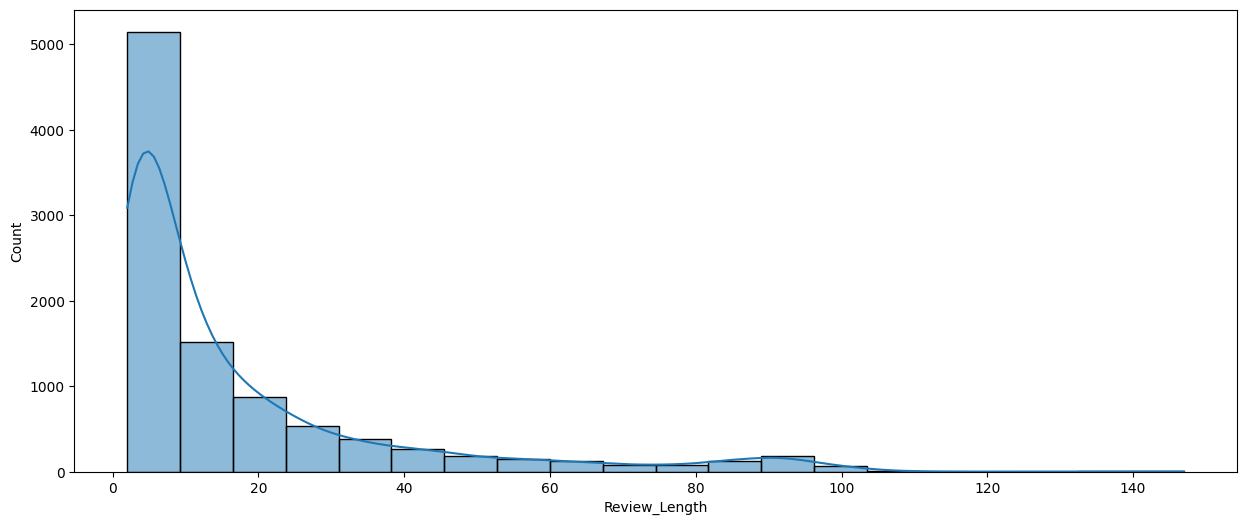

In [ ]:
# Calculate the length of each review in terms of word count and add it as a new column 'Review_Length' in the DataFrame.

df['Review_Length'] = df['Reviews'].apply(lambda x: len(x.split(' ')))

# Create a histogram plot to visualize the distribution of review lengths.
# Set the figure size to (15, 6) for better visualization.
# Use 20 bins and display a KDE (Kernel Density Estimation) plot.

plt.figure(figsize=(15,6))
sns.histplot(df['Review_Length'], bins = 20, kde = True, palette = 'hls')
plt.show()

In [ ]:
# Filter the DataFrame to get the count of review lengths for Reviews and Ratings separately.

review_df = df[df['Reviews'] == 0]['Review_Length'].value_counts().sort_index()
rating_df = df[df['Ratings'] == 1]['Review_Length'].value_counts().sort_index()

# Initialize a Plotly figure.
fig = go.Figure()

# Add a scatter plot for Reviews.
fig.add_trace(go.Scatter(
  x=review_df.index,
  y=review_df.values,
  name= 0,
  fill='tozeroy',
  marker_color= 'blue',
))

# Add a scatter plot for Ratings.
fig.add_trace(go.Scatter(
  x=rating_df.index,
  y=rating_df.values,
  name=1,
  fill='tozeroy',
  marker_color= 'red',
))

# Show the Plotly figure.
fig.show()

In [ ]:
df

,Ratings,Comment,Reviews,Review_Length
0,5,Super!,Great camera for pics and videos Battery life ...,102
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,45
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",29
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,89
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,86
...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,3
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",18
9710,5,Awesome,very niceREAD MORE,3
9711,5,Super!,Loving it as of now. Good Product .READ MORE,9


In [ ]:
# Generate descriptive statistics for the 'Review_Length' column to get an overview of its distribution.
df.Review_Length.describe()

count    9713.000000
mean       17.542469
std        21.680915
min         2.000000
25%         4.000000
50%         9.000000
75%        21.000000
max       147.000000
Name: Review_Length, dtype: float64

In [ ]:
# Create a copy of the DataFrame 'df' and store it in a new DataFrame 'df_new'.
df_new = df.copy()

In [ ]:
# Define a text cleaning function that converts text to lowercase and removes leading/trailing whitespace.

def clean_text(text):
 # Convert text to lowercase.
 text = text.lower()

 # Remove leading and trailing whitespace.
 return text.strip()

In [ ]:
# Apply the 'clean_text' function to preprocess the 'Reviews' column and store it in a new column 'message'.

df_new.message = df_new.Reviews.apply(lambda x: clean_text(x))

In [ ]:
# Import the 'string' module and retrieve a set of punctuation characters.

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Define a function to remove punctuation from text and apply it to the 'Reviews' column.

def remove_punctuation(text):
  # Join characters that are not in the set of punctuation characters.
  punctuationfree="".join([i for i in text if i not in string.punctuation])
  return punctuationfree

# Apply the 'remove_punctuation' function to the 'Reviews' column.
df_new['Reviews']= df_new['Reviews'].apply(lambda x:remove_punctuation(x))

In [ ]:
# Define a tokenization function using regular expressions and apply it to the 'Reviews' column.
import re

def tokenization(text):
  # Split the text into tokens using regular expression pattern 'W+'.
  tokens = re.split('W+',text)
  return tokens

# Apply the 'tokenization' function to the 'Reviews' column.
df_new['Reviews']= df_new['Reviews'].apply(lambda x: tokenization(x))

In [ ]:
# Download the NLTK stopwords dataset for English.

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove stopwords from each review
def remove_stopwords(text):
 output= " ".join(i for i in text if i not in stopwords)
 return output

In [ ]:
df_new['Reviews']= df_new['Reviews'].apply(lambda x:remove_stopwords(x))

In [ ]:
# Perform word stemming using Porter Stemmer
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [ ]:
def stemming(text):
 stem_text = "".join([porter_stemmer.stem(word) for word in text])
 return stem_text
df_new['Reviews']=df_new['Reviews'].apply(lambda x: stemming(x))

In [ ]:
# Perform word lemmatization using WordNet Lemmatizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatizer(text):
 lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
 return lemm_text
df_new ['Reviews']=df_new['Reviews'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Clean text by removing square brackets and words containing numbers
def clean_text(text):
 text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
 text = re.sub('\S*\d\S*\s*','', text).strip() # Remove words containing numbers
 return text.strip()

In [ ]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: clean_text(x))

In [ ]:
# Download and load spaCy model for English language
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Define a lemmatizer function using spaCy
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
 doc = nlp(text)
 sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
 return ' '.join(sent)

In [ ]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: lemmatizer(x))

KeyboardInterrupt: ignored

In [ ]:
# Remove URLs from the text
def remove_urls(vTEXT):
 vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
 return(vTEXT)

In [ ]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: remove_urls(x))

In [ ]:
# Remove digits from the text
def remove_digits(text):
 clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
 return(text)

In [ ]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: remove_digits(x))

In [ ]:
# Remove digits from individual words in the text
def remove_digits1(sample_text):
 clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) # Side effect: remo
 return(clean_text)

In [ ]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: remove_digits1(x))

In [ ]:
def remove_emojis(data):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
u"\U0001F300-\U0001F5FF" # symbols & pictographs
u"\U0001F680-\U0001F6FF" # transport & map symbols
u"\U0001F1E0-\U0001F1FF" # flags (iOS)
"]+", flags=re.UNICODE)
 return re.sub(emoji_pattern, '', data)

In [ ]:
df_new['Reviews'] = df_new.Reviews.apply(lambda x: remove_emojis(x))

In [ ]:
df_new

,Ratings,Comment,Reviews,Review_Length
0,5,Super!,great camera pic video battery life good far s...,102
1,5,Must buy!,great device let tell superb build quality gre...,45
2,5,Great product,ho love old size ie inch type definitely well ...,29
3,5,Simply awesome,iphone se good phone beautifully design give c...,89
4,5,Classy product,second iphone iphone long time android user te...,86
...,...,...,...,...
9708,5,Terrific purchase,absolutely brilliantread,3
9709,5,Classy product,superb phone iphone feel se thin pocket friend...,18
9710,5,Awesome,niceread,3
9711,5,Super!,love good product read,9


In [ ]:
# Import necessary libraries and modules
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

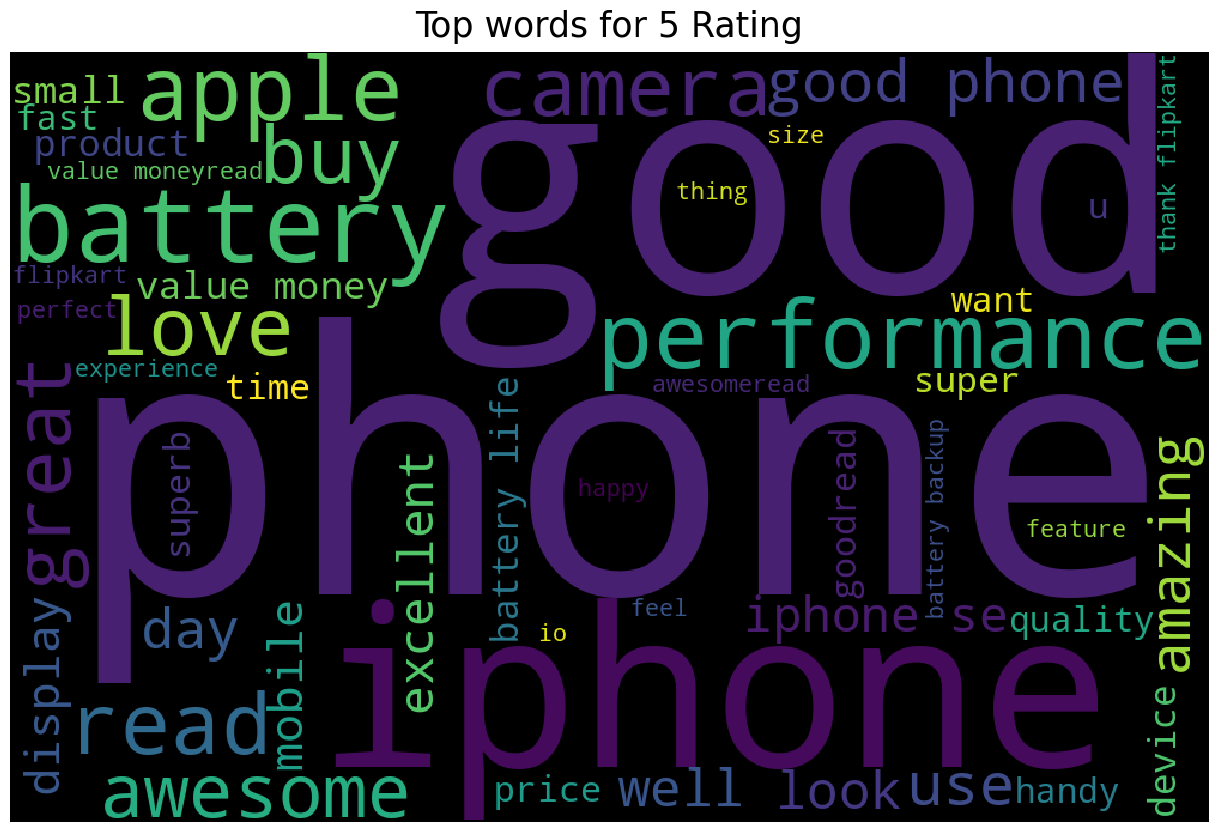

In [ ]:
# Load a custom mask image for the word cloud
mask = np.array(Image.open(r"/content/black-370118_1280.png"))

# Create a WordCloud object with custom settings
wc = WordCloud(stopwords=STOPWORDS,random_state=42,
 background_color='Black',width=mask.shape[1],height=mask.shape[0],
 max_words=50,
 mask= mask,
)

# Concatenate text associated with 5-star ratings into a single string
tok=" ".join(text for text in df_new.loc[df['Ratings'] == 5, 'Reviews'])

# Generate the word cloud using the concatenated text
wc.generate(tok)

# Configure the appearance of the word cloud plot
plt.figure(figsize=(18,10))
plt.title('Top words for 5 Rating',
 fontdict={'size': 25, 'verticalalignment': 'bottom'})
plt.imshow(wc,interpolation="None")
plt.axis("off")

# Display the word cloud plot
plt.show()

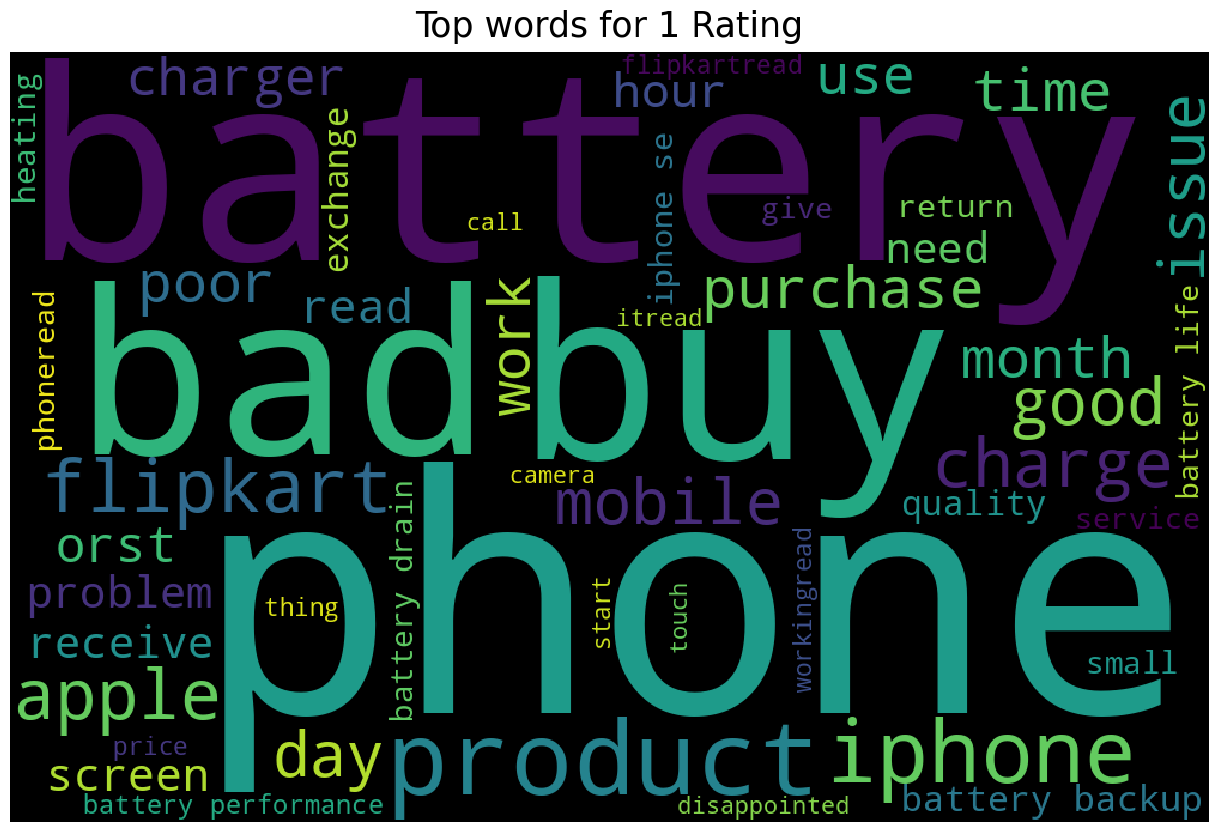

In [ ]:
# this is for creating a word cloud for one review
mask = np.array(Image.open(r"/content/black-370118_1280.png"))
wc = WordCloud(stopwords=STOPWORDS, random_state=42,
               background_color='Black', width=mask.shape[1], height=mask.shape[0],
               max_words=50,
               mask=mask,
              )

# Select text for 1 Rating
tok = " ".join(text for text in df_new.loc[df['Ratings'] == 1, 'Reviews'])
wc.generate(tok)

plt.figure(figsize=(18, 10))
plt.title('Top words for 1 Rating',
          fontdict={'size': 25, 'verticalalignment': 'bottom'})
plt.imshow(wc, interpolation="None")
plt.axis("off")
plt.show()


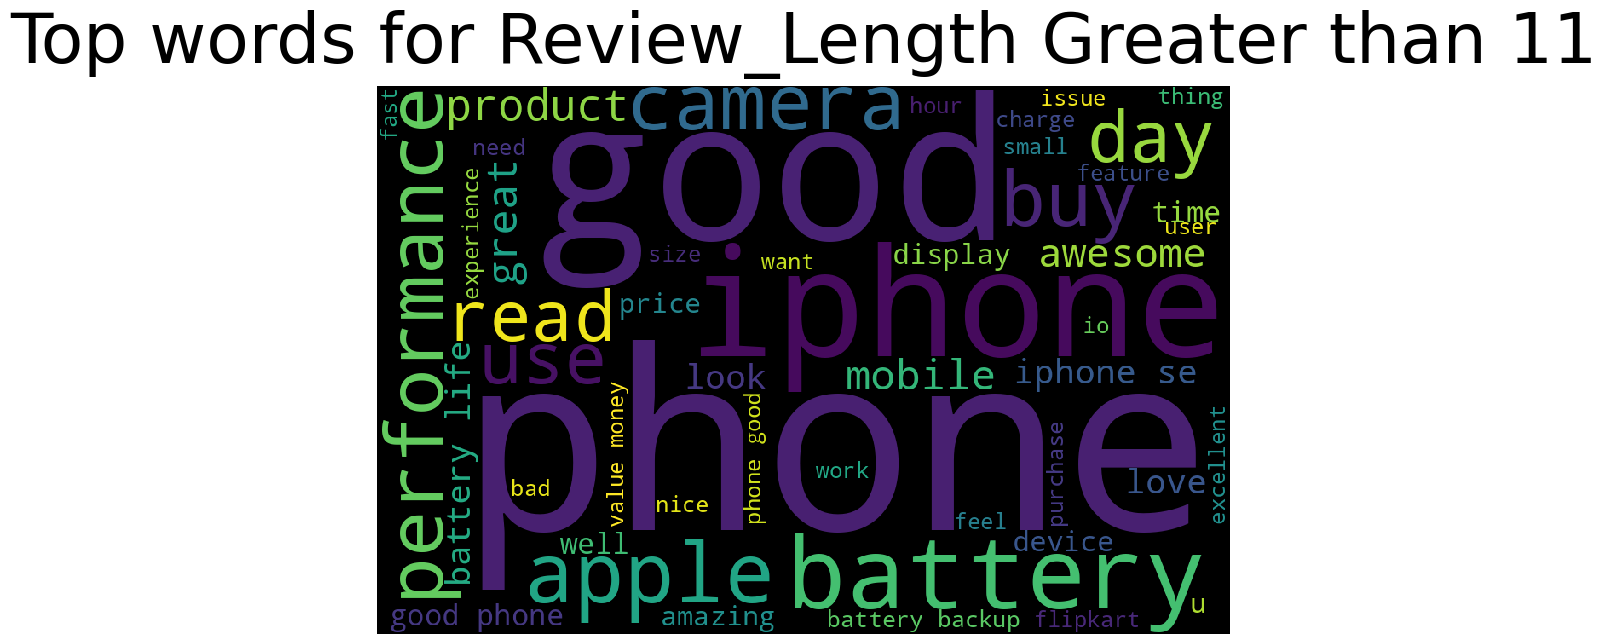

In [ ]:
# This is the word cloud for top words for reviews having length greater than 11
mask = np.array(Image.open(r"/content/black-370118_1280.png"))
wc = WordCloud(stopwords=STOPWORDS,random_state=42,
 background_color='Black',width=mask.shape[1],height=mask.shape[0],
 max_words=50,
 mask= mask,
)
tok=" ".join(text for text in df_new.loc[df['Review_Length'] >11 , 'Reviews'])
wc.generate(tok)
plt.figure(figsize=(11,25))
plt.title('Top words for Review_Length Greater than 11',
 fontdict={'size': 50, 'verticalalignment': 'bottom'})
plt.imshow(wc,interpolation="None")
plt.axis("off")
plt.show()

In [ ]:
x = df['Reviews']
y = df['Ratings']
print(len(x), len(y))

9713 9713


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# Print the number of samples in the training and testing sets
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7284 7284
2429 2429


In [ ]:
# Import necessary libraries and modules for text classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Create a text classification pipeline
pipe = Pipeline([('bow', CountVectorizer()), ('tfid', TfidfTransformer()), ('model', MultinomialNB())])

In [ ]:
# Fit the pipeline on the training data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Calculate and print the accuracy score of the classifier
print(accuracy_score(y_test, y_pred_class))

0.7019349526554137


In [ ]:
# Calculate and print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[   0    0    0    0  109]
 [   0    0    0    0   44]
 [   0    0    0    0  131]
 [   0    0    0    0  440]
 [   0    0    0    0 1705]]


In [ ]:
# Calculate and print a classification report, including precision, recall, and F1-score
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       109
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00       131
           4       0.00      0.00      0.00       440
           5       0.70      1.00      0.82      1705

    accuracy                           0.70      2429
   macro avg       0.14      0.20      0.16      2429
weighted avg       0.49      0.70      0.58      2429



In [ ]:
# Import the Natural Language Toolkit (nltk) library and the SentimentIntensityAnalyzer from nltk.sentiment.vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the 'vader_lexicon' resource
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the 'Reviews' column
df_new["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_new["Reviews"]]
df_new["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_new["Reviews"]]
df_new["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_new["Reviews"]]

# Select and reorder columns to keep only 'Reviews', 'Positive', 'Negative', and 'Neutral'
df_new = df_new[["Reviews", "Positive", "Negative", "Neutral"]]

# Select and reorder columns to keep only 'Reviews', 'Positive', 'Negative', and 'Neutral'
df_new.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Reviews,Positive,Negative,Neutral
0,great camera pic video battery life good far s...,0.187,0.000,0.813
1,great device let tell superb build quality gre...,0.625,0.000,0.375
2,ho love old size ie inch type definitely well ...,0.543,0.000,0.457
3,iphone se good phone beautifully design give c...,0.432,0.087,0.482
4,second iphone iphone long time android user te...,0.290,0.084,0.626


In [ ]:
# Printing the respective scores
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3506.43200000009
Negative:  327.47399999999965
Neutral:  5878.109999999949


In [ ]:
df_new

,Reviews,Positive,Negative,Neutral
0,great camera pic video battery life good far s...,0.187,0.000,0.813
1,great device let tell superb build quality gre...,0.625,0.000,0.375
2,ho love old size ie inch type definitely well ...,0.543,0.000,0.457
3,iphone se good phone beautifully design give c...,0.432,0.087,0.482
4,second iphone iphone long time android user te...,0.290,0.084,0.626
...,...,...,...,...
9708,absolutely brilliantread,0.000,0.000,1.000
9709,superb phone iphone feel se thin pocket friend...,0.510,0.000,0.490
9710,niceread,0.000,0.000,1.000
9711,love good product read,0.780,0.000,0.220


In [ ]:
df

,Ratings,Comment,Reviews,Review_Length
0,5,Super!,Great camera for pics and videos Battery life ...,102
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,45
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",29
3,5,Simply awesome,This iPhone SE is the best phone ever you get....,89
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,86
...,...,...,...,...
9708,5,Terrific purchase,Absolutely brilliantREAD MORE,3
9709,5,Classy product,"Superb phone. This is my 4th iPhone, I feel SE...",18
9710,5,Awesome,very niceREAD MORE,3
9711,5,Super!,Loving it as of now. Good Product .READ MORE,9


In [ ]:
# Count the number of occurrences of each unique rating in the 'Ratings' column.
ratings = df['Ratings'].value_counts()

# Extract the unique ratings and their respective counts
numbers = ratings.index
quantity = ratings.values

In [ ]:
# Create a pie chart using Plotly Express (px) and display it
figure = px.pie(df_new, values=quantity, names=numbers,hole = 0.5)
figure.show()

In [ ]:
# List of aspects for sentiment analysis
aspects = ['battery backup', 'value for money', 'features', 'handy', 'look',
    'display', 'battery life', 'camera', 'battery', 'heating',
    'charger issue', 'service', 'battery drain', 'call', 'touch',
    'screen', 'price', 'size']


In [ ]:
# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Create dictionaries to store sentiment scores and review counts for each aspect
aspect_sentiments = {aspect: [] for aspect in aspects}
aspect_review_counts = {aspect: 0 for aspect in aspects}


In [ ]:
# Iterate through the reviews and perform aspect-based sentiment analysis
for review in df['Reviews']:

   # Convert the review text to lowercase for consistent matching
    review = review.lower()

    # Perform sentiment analysis on the review using the 'sentiments' analyzer
    sentiment_scores = sentiments.polarity_scores(review)

    # Iterate through the aspects you want to analyze
    for aspect in aspects:

      # Check if the aspect keyword is present in the review text
        if aspect in review:

           #Append the sentiment scores of the review
            aspect_sentiments[aspect].append(sentiment_scores)

            # Increment the review count for the aspect in aspect_review_counts
            aspect_review_counts[aspect] += 1


In [ ]:
# Calculate average sentiment scores for each aspect

# Create an empty dictionary to store the average sentiment scores for each aspect
average_aspect_sentiments = {}

# Iterate over each aspect and its corresponding sentiment scores in the aspect_sentiments dictionary
for aspect, scores in aspect_sentiments.items():

  # Check if there are sentiment scores available for the aspect (avoid division by zero)
    if len(scores) > 0:
        average_scores = {
            'positive': sum(score['pos'] for score in scores) / len(scores),
            'neutral': sum(score['neu'] for score in scores) / len(scores),
            'negative': sum(score['neg'] for score in scores) / len(scores),
        }
        average_aspect_sentiments[aspect] = average_scores


In [ ]:
# Display average sentiment scores for each aspect

# Iterate over each aspect and its corresponding sentiment scores in the dictionary
for aspect, scores in average_aspect_sentiments.items():
    print(f"Aspect: {aspect}")
    print(f"Positive: {scores['positive']:.2f}")
    print(f"Neutral: {scores['neutral']:.2f}")
    print(f"Negative: {scores['negative']:.2f}")
    print(f"Number of Reviews: {aspect_review_counts[aspect]}")
    print()


Aspect: battery backup
Positive: 0.17
Neutral: 0.77
Negative: 0.07
Number of Reviews: 325

Aspect: value for money
Positive: 0.33
Neutral: 0.65
Negative: 0.02
Number of Reviews: 457

Aspect: features
Positive: 0.22
Neutral: 0.75
Negative: 0.03
Number of Reviews: 167

Aspect: handy
Positive: 0.24
Neutral: 0.74
Negative: 0.02
Number of Reviews: 353

Aspect: look
Positive: 0.23
Neutral: 0.74
Negative: 0.02
Number of Reviews: 337

Aspect: display
Positive: 0.20
Neutral: 0.76
Negative: 0.04
Number of Reviews: 470

Aspect: battery life
Positive: 0.19
Neutral: 0.75
Negative: 0.06
Number of Reviews: 378

Aspect: camera
Positive: 0.24
Neutral: 0.73
Negative: 0.03
Number of Reviews: 1304

Aspect: battery
Positive: 0.17
Neutral: 0.77
Negative: 0.06
Number of Reviews: 2447

Aspect: heating
Positive: 0.08
Neutral: 0.83
Negative: 0.10
Number of Reviews: 69

Aspect: service
Positive: 0.26
Neutral: 0.68
Negative: 0.06
Number of Reviews: 116

Aspect: battery drain
Positive: 0.09
Neutral: 0.85
Negative:

In [ ]:
# Visualize aspect sentiment scores

# Extract aspect names from the dictionary keys

aspect_names = list(average_aspect_sentiments.keys())

# Extracting the positive, neutral and negative sentiment scores from the dictionary values

positive_scores = [scores['positive'] for scores in average_aspect_sentiments.values()]
negative_scores = [scores['negative'] for scores in average_aspect_sentiments.values()]
neutral_scores = [scores['neutral'] for scores in average_aspect_sentiments.values()]

# Create a bar chart using Plotly Express (px)

fig = px.bar(
    x=aspect_names,   # X-axis: Aspect names
    y=[positive_scores, negative_scores, neutral_scores],  # Y-axis: Sentiment scores for positive, negative, and neutral
    labels={'y': 'Sentiment Scores'},  # Y-axis label
    title='Aspect-Based Sentiment Analysis',  # Chart title
    color_discrete_map={'0': 'green', '1': 'red', '2': 'blue'},  # Color mapping for bars
)

# Set the bar chart mode to 'stack' for stacked bars

fig.update_layout(barmode='stack')

# Display the plot

fig.show()

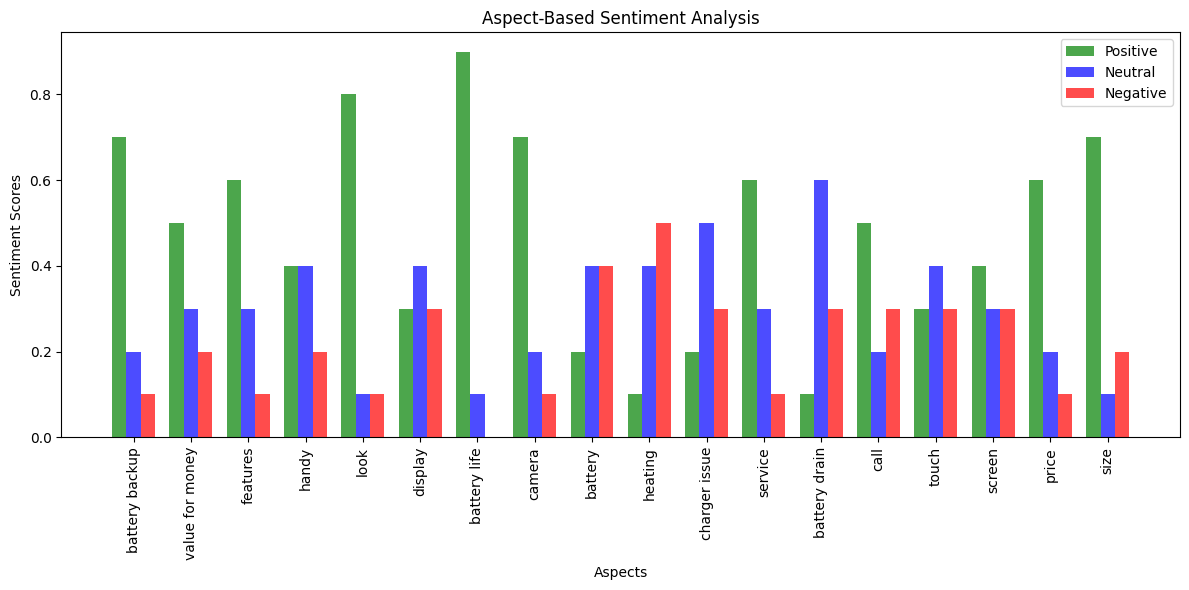

In [ ]:
# Sample sentiment scores for each aspect (replace with your actual data)
positive_scores = [0.7, 0.5, 0.6, 0.4, 0.8, 0.3, 0.9, 0.7, 0.2, 0.1, 0.2, 0.6, 0.1, 0.5, 0.3, 0.4, 0.6, 0.7]
neutral_scores = [0.2, 0.3, 0.3, 0.4, 0.1, 0.4, 0.1, 0.2, 0.4, 0.4, 0.5, 0.3, 0.6, 0.2, 0.4, 0.3, 0.2, 0.1]
negative_scores = [0.1, 0.2, 0.1, 0.2, 0.1, 0.3, 0.0, 0.1, 0.4, 0.5, 0.3, 0.1, 0.3, 0.3, 0.3, 0.3, 0.1, 0.2]

# Set the width of the bars
bar_width = 0.25

# Calculate the positions of the bars on the x-axis
index = np.arange(len(aspects))

# Create subplots for positive, neutral, and negative scores
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar plots for each sentiment category
plt.bar(index - bar_width, positive_scores, bar_width, label='Positive', color='g', alpha=0.7)
plt.bar(index, neutral_scores, bar_width, label='Neutral', color='b', alpha=0.7)
plt.bar(index + bar_width, negative_scores, bar_width, label='Negative', color='r', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Aspects')
plt.ylabel('Sentiment Scores')
plt.title('Aspect-Based Sentiment Analysis')
plt.xticks(index, aspects, rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import joblib

joblib.dump(MultinomialNB, 'multinomialNB.pkl',protocol=2)

['multinomialNB.pkl']

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/gdrive'

Mounted at /content/gdrive


In [ ]:
import shutil

# Define the source path (local) and destination path (Google Drive)
source_path = 'multinomialNB.pkl'
destination_path = '/content/gdrive/My Drive/Sentiment/multinomialNB.pkl'  # Replace with your desired destination path

# Move the file to Google Drive
shutil.move(source_path, destination_path)


FileNotFoundError: ignored

In [ ]:
def overview(dy):
  return osi ,neg ,neu
def feature(df):
  return aspect


In [ ]:
@app.route(/apple):
def displayer():
  df = pd.read(ap)
  osi,nue,neg = overview(df)
  aspet = feature